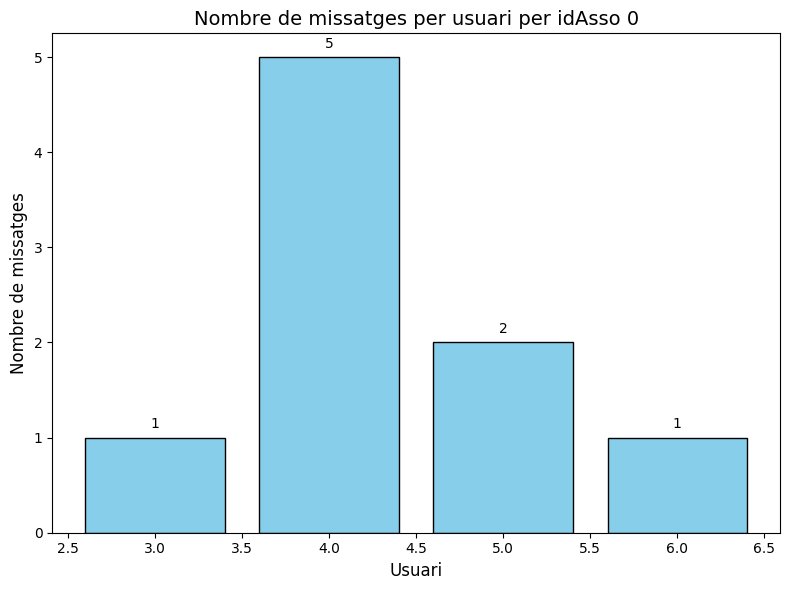

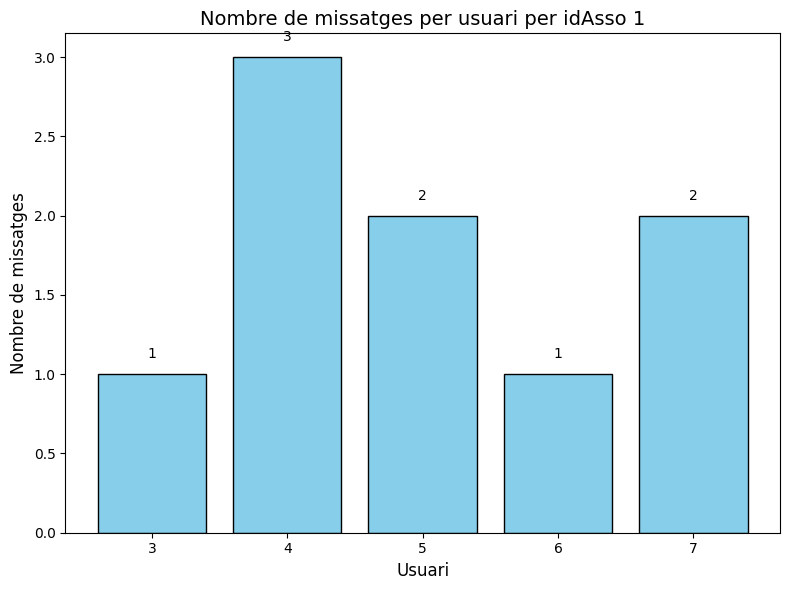

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
from datetime import datetime

# Llegim el fitxer JSON amb les dades del xat
with open("messages.json", "r") as f:
    dades = json.load(f)

# Convertim les dades a un DataFrame de pandas
df = pd.DataFrame(dades)

# Obtenim els valors únics de idAsso
idAsso_unics = df['idAsso'].unique()

# Assegura't que la carpeta statImages existeix
if not os.path.exists('statImages'):
    os.makedirs('statImages')

# Generem un gràfic per a cada idAsso
for idAsso in idAsso_unics:
    df_filtrat = df[df['idAsso'] == idAsso]
    usuaris = df_filtrat['idUser']
    n_messages = usuaris.value_counts()

    # Generem el gràfic de barres
    plt.figure(figsize=(8, 6))  # Definim la mida del gràfic
    plt.bar(n_messages.index, n_messages.values, color='skyblue', edgecolor='black')  # Gràfic de barres

    # Afegim títol i etiquetes
    plt.title(f"Nombre de missatges per usuari per idAsso {idAsso}", fontsize=14)
    plt.xlabel("Usuari", fontsize=12)
    plt.ylabel("Nombre de missatges", fontsize=12)

    # Afegim valors sobre les barres
    for i, v in enumerate(n_messages.values):
        plt.text(n_messages.index[i], v + 0.1, str(int(v)), ha='center', fontsize=10)  # Mostrem el valor a sobre de cada barra

    # Genera un nom únic per al fitxer basat en la data i l'hora actuals
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'statImages/grafic_{idAsso}_{timestamp}.png'

    # Guarda el gràfic a la carpeta statImages
    plt.savefig(filename)

    # Mostrem el gràfic
    plt.tight_layout()  # Ajustem automàticament els marges
    plt.show()